# DSA Pandas - EDA

## Importing the Libraries

In [1]:
# Importing the libraries
import pandas as pd
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

## Data Cleaning

In [2]:
# Read the csv file as pandas dataframe
customer_data = pd.read_csv("dados/synthetic_customer_data.csv")
# Display 
customer_data.head()

,Customer_ID,Age,Gender,Annual_Income,Country,Purchase_Date,Number_of_Purchases,Subscription,Favorite_Product_Category,Customer_Satisfaction_Score
0,CUST_0001,56.0,Female,40771.321763,US,2021-03-20,93,False,Clothing,4.0
1,CUST_0002,69.0,F,55741.992007,Canada,2021-02-27,31,True,Automotive,5.0
2,CUST_0003,46.0,Female,57382.115509,France,2023-12-31,47,False,Home & Garden,8.0
3,CUST_0004,32.0,M,27088.210612,United Kingdom,2021-08-14,55,False,Home & Garden,1.0
4,CUST_0005,60.0,F,52707.387582,Germany,2021-10-12,80,True,Electonics,1.0


In [3]:
# Info about the dataframe
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  200 non-null    object 
 1   Age                          185 non-null    float64
 2   Gender                       200 non-null    object 
 3   Annual_Income                190 non-null    float64
 4   Country                      200 non-null    object 
 5   Purchase_Date                190 non-null    object 
 6   Number_of_Purchases          200 non-null    int64  
 7   Subscription                 200 non-null    bool   
 8   Favorite_Product_Category    200 non-null    object 
 9   Customer_Satisfaction_Score  185 non-null    float64
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 14.4+ KB


In [4]:
# Statistics from the dataframe
customer_data.describe()

,Age,Annual_Income,Number_of_Purchases,Customer_Satisfaction_Score
count,185.000000,190.000000,200.000000,185.000000
mean,42.913514,57422.901213,81.475000,5.032432
std,15.115968,62910.811179,218.458026,2.754251
min,18.000000,-461.432897,2.000000,1.000000
25%,30.000000,39589.535592,21.000000,3.000000
50%,43.000000,50660.399192,50.000000,5.000000
75%,56.000000,61456.274552,79.000000,7.000000
max,69.000000,660421.692806,1985.000000,10.000000


In [5]:
# Checking for missing values
customer_data.isnull().sum()

Customer_ID                     0
Age                            15
Gender                          0
Annual_Income                  10
Country                         0
Purchase_Date                  10
Number_of_Purchases             0
Subscription                    0
Favorite_Product_Category       0
Customer_Satisfaction_Score    15
dtype: int64

In [6]:
# Missing values in numerical columns
# Numerical Columns
numerical_columns = ["Age", "Annual_Income", "Customer_Satisfaction_Score"]
# Loop for replace the NaN values
for column in numerical_columns:
    customer_data.fillna({column: customer_data[column].median()}, inplace=True)

In [7]:
# Missing values in Data
customer_data["Purchase_Date"] = customer_data["Purchase_Date"].ffill()
# Checking for missing values
customer_data.isnull().sum()

Customer_ID                    0
Age                            0
Gender                         0
Annual_Income                  0
Country                        0
Purchase_Date                  0
Number_of_Purchases            0
Subscription                   0
Favorite_Product_Category      0
Customer_Satisfaction_Score    0
dtype: int64

In [8]:
# Format data in the column Gender
customer_data["Gender"].unique()

array(['Female', 'F', 'M', 'Male'], dtype=object)

In [9]:
# Replacing the values
customer_data['Gender'] = customer_data['Gender'].replace({'M': 'Male', 'F': 'Female'})
# Checking if it worked
customer_data["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [10]:
# Format data in the column Country
customer_data["Country"].unique()

array(['US', 'Canada', 'France', 'United Kingdom', 'Germany', 'USA', 'UK',
       'United States', 'GER', 'CAN'], dtype=object)

In [11]:
# Replacing the values
customer_data['Country'] = customer_data['Country'].replace({'US': 'United States', 
                                                             'USA': 'United States',
                                                             'UK': 'United Kingdom',
                                                             'GER': 'Germany',
                                                             'CAN': "Canadá"
                                                            })

# Checking if it worked
customer_data["Country"].unique()

array(['United States', 'Canada', 'France', 'United Kingdom', 'Germany',
       'Canadá'], dtype=object)

In [12]:
# Cheking the column Favorite_Product_Category
customer_data['Favorite_Product_Category'].unique()

array(['Clothing', 'Automotive', 'Home & Garden', 'Electonics', 'Toys',
       'Sports', 'Books', 'Electronics', 'Boks', 'Toyz', 'Automtoive',
       'Clthng'], dtype=object)

In [13]:
# Replace the wrong words
customer_data['Favorite_Product_Category'] = customer_data['Favorite_Product_Category'].replace({"Automtoive": "Automotive", 
                                                                                                 "Boks": "Books", 
                                                                                                 "Clthng": "Clothing", 
                                                                                                 "Electonics": "Electronics",
                                                                                                 "Toyz": "Toys"})

In [14]:
# Cheking the column Favorite_Product_Category
customer_data['Favorite_Product_Category'].unique()

array(['Clothing', 'Automotive', 'Home & Garden', 'Electronics', 'Toys',
       'Sports', 'Books'], dtype=object)

In [15]:
# Convert the column Purchase_Date to datetime format
customer_data["Purchase_Date"] = pd.to_datetime(customer_data["Purchase_Date"], format="%Y-%m-%d")

In [16]:
# Convert to the propper type the numerical columns
customer_data["Age"] = customer_data["Age"].astype("int")
customer_data["Annual_Income"] = customer_data["Annual_Income"].round(decimals = 2)

In [17]:
# Dummy for the Subscription column
customer_data["Subscription_dummy"] = customer_data["Subscription"].astype(int)

In [18]:
# View the results
customer_data.head(10)

,Customer_ID,Age,Gender,Annual_Income,Country,Purchase_Date,Number_of_Purchases,Subscription,Favorite_Product_Category,Customer_Satisfaction_Score,Subscription_dummy
0,CUST_0001,56,Female,40771.32,United States,2021-03-20,93,False,Clothing,4.0,0
1,CUST_0002,69,Female,55741.99,Canada,2021-02-27,31,True,Automotive,5.0,1
2,CUST_0003,46,Female,57382.12,France,2023-12-31,47,False,Home & Garden,8.0,0
3,CUST_0004,32,Male,27088.21,United Kingdom,2021-08-14,55,False,Home & Garden,1.0,0
4,CUST_0005,60,Female,52707.39,Germany,2021-10-12,80,True,Electronics,1.0,1
5,CUST_0006,25,Female,66065.62,United States,2021-01-04,62,False,Toys,4.0,0
6,CUST_0007,38,Female,61467.17,France,2021-04-09,30,True,Clothing,3.0,1
7,CUST_0008,56,Female,33332.54,Canada,2021-02-08,55,True,Sports,10.0,1
8,CUST_0009,36,Male,37060.77,United Kingdom,2021-09-28,16,False,Books,2.0,0
9,CUST_0010,40,Male,61858.91,United States,2021-10-12,12,True,Home & Garden,3.0,1


## EDA

### Unique counts

In [19]:
# Counting the values
gender_counts = customer_data["Gender"].value_counts()

# Reset the index to turn the 'Gender' index into a column
gender_counts_df = gender_counts.reset_index()

# Rename the columns if necessary
gender_counts_df.columns = ['Gender', 'Counts']
gender_counts_df

,Gender,Counts
0,Female,114
1,Male,86


In [20]:
# Counting the values
product_cateogry_counts = customer_data["Favorite_Product_Category"].value_counts()

# Reset the index to turn the 'Gender' index into a column
product_cateogry_counts_df = product_cateogry_counts.reset_index()

# Rename the columns if necessary
product_cateogry_counts_df.columns = ['Favorite_Product_Category', 'Counts']
product_cateogry_counts_df

,Favorite_Product_Category,Counts
0,Books,35
1,Home & Garden,34
2,Sports,33
3,Electronics,31
4,Automotive,26
5,Toys,23
6,Clothing,18


In [21]:
# Counting the values
country_counts = customer_data["Country"].value_counts()

# Reset the index to turn the 'Gender' index into a column
country_counts_df = country_counts.reset_index()

# Rename the columns if necessary
country_counts_df.columns = ['Country', 'Counts']
country_counts_df

,Country,Counts
0,United States,63
1,United Kingdom,42
2,Germany,38
3,France,25
4,Canadá,20
5,Canada,12


In [22]:
# Convert boolean to string labels and then count
subscription_counts = customer_data["Subscription"].map({True: 'Subscribed', False: 'Not Subscribed'}).value_counts()

# Reset the index to turn the 'Gender' index into a column
subscription_counts_df = subscription_counts.reset_index()

# Rename the columns if necessary
subscription_counts_df.columns = ['Subscription', 'Counts']
subscription_counts_df

,Subscription,Counts
0,Subscribed,107
1,Not Subscribed,93


### Grouped Tables

In [23]:
# Purchases by category
product_category_purchases = customer_data.groupby("Favorite_Product_Category")["Number_of_Purchases"].sum()

# Reset the index to turn the 'Gender' index into a column
product_category_purchases_df = product_category_purchases.reset_index()

# Rename the columns if necessary
product_category_purchases_df.columns = ['Favorite_Product_Category', 'Number_of_Purchases']
product_category_purchases_df

,Favorite_Product_Category,Number_of_Purchases
0,Automotive,2614
1,Books,4816
2,Clothing,953
3,Electronics,1486
4,Home & Garden,2487
5,Sports,1787
6,Toys,2152


In [24]:
# Find the category with the maximum number of purchases
max_purchases = product_category_purchases_df["Number_of_Purchases"].max()
max_category = product_category_purchases_df["Favorite_Product_Category"][product_category_purchases_df["Number_of_Purchases"] == max_purchases].loc[1]

# Combine them into a DataFrame
product_category_purchases_max_df = pd.DataFrame({
    'Favorite_Product_Category': [max_category],
    'Number_of_Purchases': [max_purchases]
})

product_category_purchases_max_df

,Favorite_Product_Category,Number_of_Purchases
0,Books,4816


In [25]:
# Group by 'Gender' and 'Favorite_Product_Category' and sum 'Number_of_Purchases'
product_category_gender = customer_data.groupby(['Gender', 'Favorite_Product_Category'])['Number_of_Purchases'].sum().reset_index()

# Use pivot_table to create separate columns for each gender
product_category_gender_pivot = product_category_gender.pivot_table(
    index='Favorite_Product_Category',
    columns='Gender',
    values='Number_of_Purchases',
    fill_value=0  # Fill missing values with 0 if any
)

# Reset the index to turn 'Favorite_Product_Category' back into a column
product_category_gender_pivot = product_category_gender_pivot.reset_index()

# Display the result
product_category_gender_pivot

Gender,Favorite_Product_Category,Female,Male
0,Automotive,2181.0,433.0
1,Books,4048.0,768.0
2,Clothing,548.0,405.0
3,Electronics,1019.0,467.0
4,Home & Garden,768.0,1719.0
5,Sports,1140.0,647.0
6,Toys,1620.0,532.0


In [26]:
# Salary by gender
annual_salary_gender = customer_data.groupby("Gender")["Annual_Income"].sum()

# Reset the index to turn the 'Gender' index into a column
annual_salary_gender_df = annual_salary_gender.reset_index()

# Rename the columns if necessary
annual_salary_gender_df.columns = ['Gender', 'Salary']
annual_salary_gender_df

,Gender,Salary
0,Female,7206442.81
1,Male,4210512.40


In [27]:
# Get the mean value
mean_annual_salary_gender = round(annual_salary_gender / gender_counts, 2)

# Reset the index to turn the 'Gender' index into a column
mean_annual_salary_gender_df = mean_annual_salary_gender.reset_index()

# Rename the columns if necessary
mean_annual_salary_gender_df.columns = ['Gender', 'Mean_Salary']
mean_annual_salary_gender_df

,Gender,Mean_Salary
0,Female,63214.41
1,Male,48959.45


In [28]:
# Gender and Age
age_gender = customer_data.groupby("Gender")["Age"].mean().round(decimals = 2)
age_gender

# Reset the index to turn the 'Gender' index into a column
age_gender_df = age_gender.reset_index()

# Rename the columns if necessary
age_gender_df.columns = ['Gender', 'Mean_Age']

age_gender_df

,Gender,Mean_Age
0,Female,44.04
1,Male,41.43


In [29]:
# Gender and Subscription
subscription_gender = customer_data.groupby("Gender")["Subscription"].value_counts()

# Unstack to create a DataFrame
subscription_gender_df = subscription_gender.unstack()
subscription_gender_df

Subscription,False,True
Gender,,
Female,51,63
Male,42,44


## Queries Questions

### Q1. How many customers are there in each country?

In [30]:
# Groupby and counting the unique values
customers_by_country = customer_data.groupby("Country")["Customer_ID"].nunique()
customers_by_country

Country
Canada            12
Canadá            20
France            25
Germany           38
United Kingdom    42
United States     63
Name: Customer_ID, dtype: int64

### Q2. What is the average annual income of customers who have a subscription?

In [31]:
# Filter the data for customers who have a subscription
subscribed_customers = customer_data[customer_data["Subscription"] == True]

# Calculate the average annual income of those customers
average_annual_income = subscribed_customers["Annual_Income"].mean()

# Display the result
round(average_annual_income, 2)

52708.97

### Q3. How many customers are in each favorite product category?

In [32]:
# Groupby and counting the unique values
customers_by_category = customer_data.groupby("Favorite_Product_Category")["Customer_ID"].nunique()
customers_by_category

Favorite_Product_Category
Automotive       26
Books            35
Clothing         18
Electronics      31
Home & Garden    34
Sports           33
Toys             23
Name: Customer_ID, dtype: int64

### Q4. Which country has the highest average customer satisfaction score?

In [33]:
# Group by 'Country' and calculate the average customer satisfaction score
average_satisfaction_by_country = customer_data.groupby("Country")["Customer_Satisfaction_Score"].mean()

# Identify the country with the highest average satisfaction score
highest_satisfaction_country = average_satisfaction_by_country.idxmax()
highest_satisfaction_score = average_satisfaction_by_country.max()

highest_satisfaction_country, highest_satisfaction_score

('France', 5.56)

### Q5. How many customers have made more than 50 purchases?

In [34]:
customers_50 = customer_data[customer_data["Number_of_Purchases"] > 50]
# Calculate the total number of purchases
total_purchases_50 = customers_50["Number_of_Purchases"].sum()
total_purchases_50

14068

### Q6. What is the total number of purchases made by customers from the United States?

In [35]:
customers_usa = customer_data[customer_data["Country"] == "United States"]
# Calculate the total number of purchases
total_purchases_usa = customers_usa["Number_of_Purchases"].sum()
total_purchases_usa

5157

In [36]:
### Q7. Which customer has the highest annual income, and what is that income?

In [37]:
highest_value = customer_data["Annual_Income"].max()
highest_customer = customer_data[customer_data["Annual_Income"] == highest_value]
highest_customer["Customer_ID"]

43    CUST_0044
Name: Customer_ID, dtype: object

### Q8. How many customers are aged 30 or younger?

In [38]:
customers_age_30 = customer_data[customer_data["Age"] <= 30]
# Calculate the total number of purchases
total_purchases_30 = customers_age_30["Number_of_Purchases"].sum()
total_purchases_30

3658

### Q9. What is the average number of purchases for each gender?

In [39]:
avarage_gender_purchase = customer_data.groupby("Gender")["Number_of_Purchases"].mean()
avarage_gender_purchase

Gender
Female    99.333333
Male      57.802326
Name: Number_of_Purchases, dtype: float64

### Q10. Which product category has the highest average annual income among customers who favor it?

In [40]:
highest_product_category_avarage_annual = customer_data.groupby("Favorite_Product_Category")["Annual_Income"].mean()
highest_product_category_avarage_annual

# Identify the country with the highest average satisfaction score
highest_category = highest_product_category_avarage_annual.idxmax()
highest_value = highest_product_category_avarage_annual.max()

highest_category, highest_value

('Clothing', 74829.54166666667)

### Q11. How many customers have a satisfaction score above 7 and a subscription?

In [41]:
customers_satisfaction_and_subscription = customer_data[
    (customer_data["Customer_Satisfaction_Score"] > 7) & 
    (customer_data["Subscription"] == True)
]

# Count the number of such customers
num_customers = customers_satisfaction_and_subscription.shape[0]
num_customers

25

### Q12. Which age group (under 30, 30-50, over 50) has the most customers?

In [42]:
customer_data['Age_Group'] = pd.cut(
    customer_data['Age'], 
    bins=[0, 30, 50, float('inf')], 
    labels=['Under 30', '30-50', 'Over 50']
)

# Count the number of customers in each age group
age_group_counts = customer_data['Age_Group'].value_counts()

# Identify the age group with the most customers
most_customers_age_group = age_group_counts.idxmax()
most_customers_count = age_group_counts.max()

most_customers_age_group, most_customers_count

('30-50', 86)

### Q13. What is the average number of purchases made by customers from each country?

In [43]:
avarage_purchases_country = customer_data.groupby("Country")["Number_of_Purchases"].mean()
avarage_purchases_country

Country
Canada             49.833333
Canadá             48.600000
France             44.160000
Germany           125.210526
United Kingdom     88.238095
United States      81.857143
Name: Number_of_Purchases, dtype: float64

### Q14. Missing Values

In [44]:
# Read the CSV file as a pandas DataFrame
customer_data_original = pd.read_csv("dados/synthetic_customer_data.csv")

# Find customers with missing data in the 'Annual_Income' column
missing_values_customers = customer_data_original[customer_data_original["Annual_Income"].isna()]

# Get the number of customers with missing data
number_of_missing_values = missing_values_customers.shape[0]

number_of_missing_values

10

### Q15. What percentage of customers with a subscription have a customer satisfaction score below 5?

In [45]:
customer_sub = customer_data[customer_data["Subscription"] == True]
customer_sub_satisf_5 = customer_sub[customer_sub["Customer_Satisfaction_Score"] < 5]

percentual = round((customer_sub_satisf_5.shape[0]/customer_sub.shape[0])*100, 2)
print(percentual, "%")

43.93 %


### Q16. Which country has the most customers with a satisfaction score of 9 or higher?

In [46]:
customers_satisf_9 = customer_data[customer_data["Customer_Satisfaction_Score"] >= 9]

# Group by country and count the number of customers in each country
customers_countries_9 = customers_satisf_9.groupby("Country")["Customer_ID"].count()

# Sort the result to find the country with the most customers with a satisfaction score of 9 or higher
customers_countries_9 = customers_countries_9.sort_values(ascending=False)

customers_countries_9

Country
United States     11
United Kingdom     5
France             4
Canadá             2
Germany            2
Canada             1
Name: Customer_ID, dtype: int64

### Q17. What is the distribution of customer satisfaction scores for each product category?

In [47]:
# Group by product category and customer satisfaction score, then count the occurrences
customers_satisf_scores = customer_data.groupby(["Favorite_Product_Category", "Customer_Satisfaction_Score"]).size()

# Optionally, reset the index to have a flat DataFrame
customers_satisf_scores = customers_satisf_scores.reset_index(name='Count')

# View the results
customers_satisf_scores

,Favorite_Product_Category,Customer_Satisfaction_Score,Count
0,Automotive,1.0,2
1,Automotive,2.0,4
2,Automotive,3.0,2
3,Automotive,4.0,1
4,Automotive,5.0,7
...,...,...,...
57,Toys,5.0,6
58,Toys,6.0,3
59,Toys,7.0,1
60,Toys,8.0,4


### Q18. How many customers have made a purchase after January 1, 2022, and how many of them have a subscription?

In [48]:
# Filter customers who made a purchase after January 1, 2022
customers_after_2022 = customer_data[customer_data['Purchase_Date'] > '2022-01-01']

# Count the total number of customers
total_customers_after_2022 = customers_after_2022.shape[0]

# Count how many of these customers have a subscription
subscribed_customers_after_2022 = customers_after_2022[customers_after_2022['Subscription'] == True].shape[0]

# Print the results
print(f"Total customers who made a purchase after January 1, 2022: {total_customers_after_2022}")
print(f"Customers with a subscription who made a purchase after January 1, 2022: {subscribed_customers_after_2022}")

Total customers who made a purchase after January 1, 2022: 10
Customers with a subscription who made a purchase after January 1, 2022: 5


### Q19. What is the average customer satisfaction score for each age group (under 30, 30-50, over 50)? 

In [49]:
# Define the age groups
def categorize_age(age):
    if age < 30:
        return 'Under 30'
    elif 30 <= age <= 50:
        return '30-50'
    else:
        return 'Over 50'

# Apply the function to create a new column 'Age_Group'
customer_data['Age_Group'] = customer_data['Age'].apply(categorize_age)

# Group by the 'Age_Group' and calculate the average customer satisfaction score
average_satisfaction_by_age_group = customer_data.groupby('Age_Group')['Customer_Satisfaction_Score'].mean()

# Print the result
print(average_satisfaction_by_age_group)

Age_Group
30-50       4.920455
Over 50     5.014925
Under 30    5.266667
Name: Customer_Satisfaction_Score, dtype: float64


## Data Viz

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

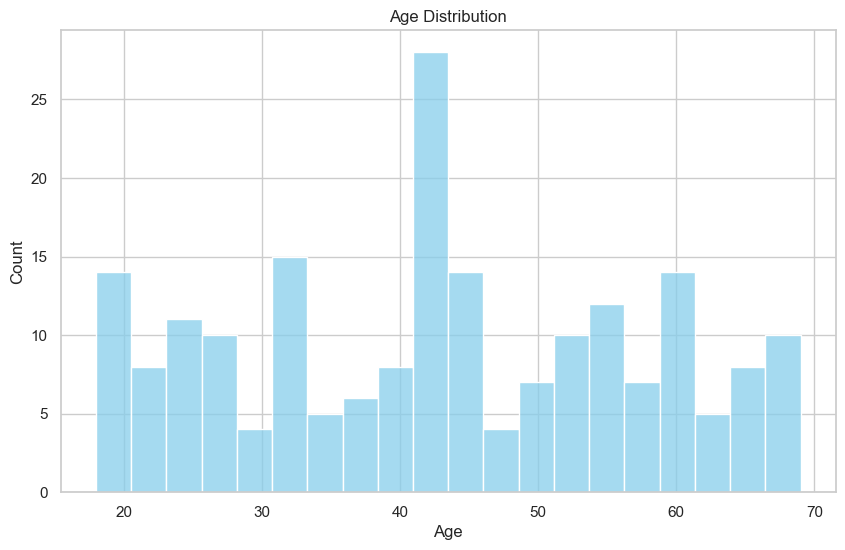

In [51]:
# Plotting the requested bar charts

# Bar chart for Age
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['Age'], bins=20, kde=False, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

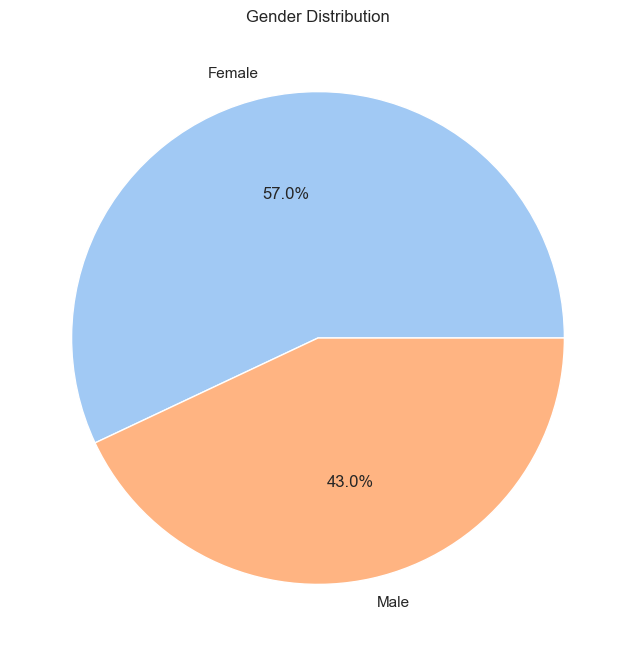

In [52]:
# Pie chart for Gender count
plt.figure(figsize=(8, 8))
gender_count = customer_data['Gender'].value_counts()
plt.pie(gender_count.values, labels=gender_count.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Gender Distribution')
plt.show()

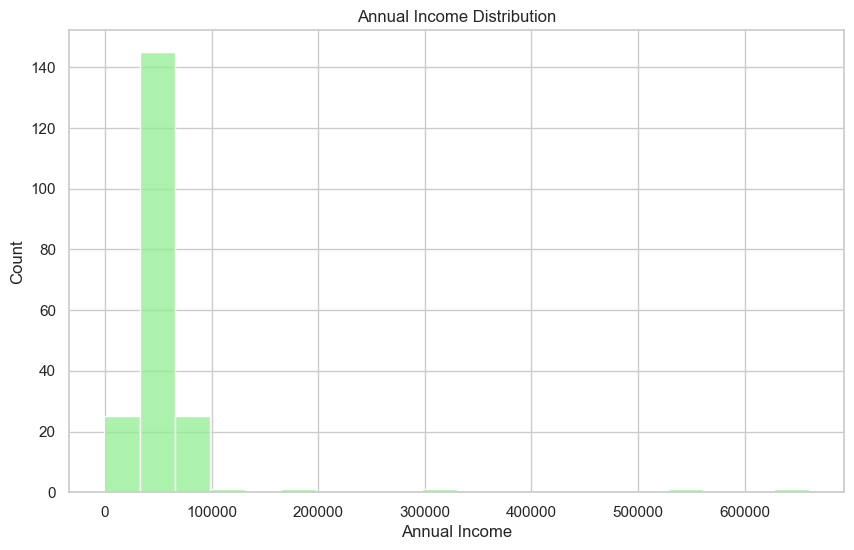

In [53]:
# Bar chart for Annual Income
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['Annual_Income'], bins=20, kde=False, color='lightgreen')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.show()

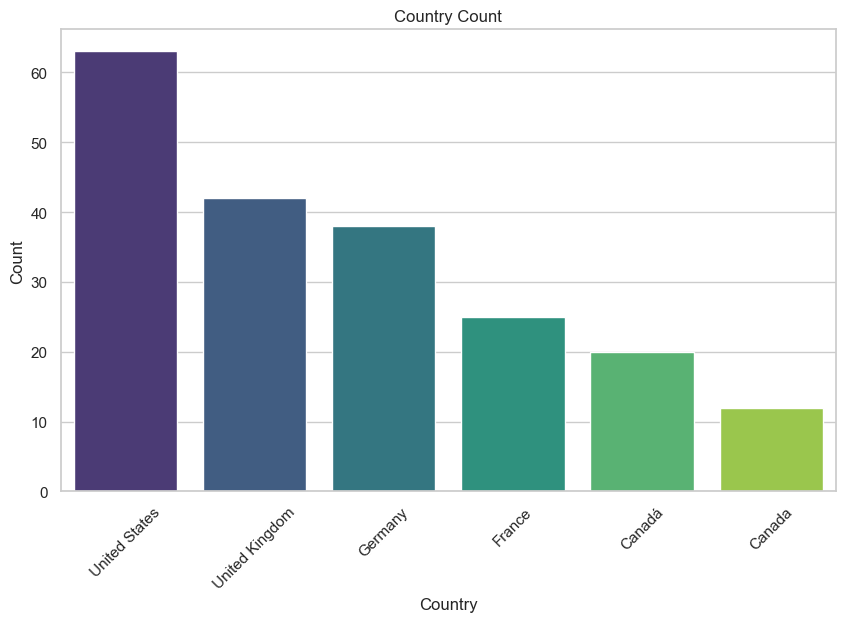

In [54]:
# Bar chart for Country count
plt.figure(figsize=(10, 6))
country_count = customer_data['Country'].value_counts()
sns.barplot(x=country_count.index, y=country_count.values, palette='viridis')
plt.title('Country Count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

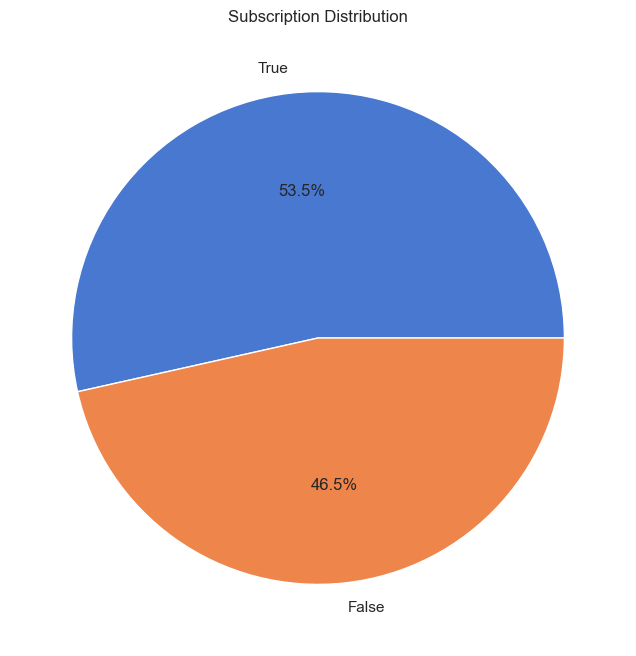

In [55]:
# Pie chart for Subscription count
plt.figure(figsize=(8, 8))
subscription_count = customer_data['Subscription'].value_counts()
plt.pie(subscription_count.values, labels=subscription_count.index.astype(str), autopct='%1.1f%%', colors=sns.color_palette('muted'))
plt.title('Subscription Distribution')
plt.show()

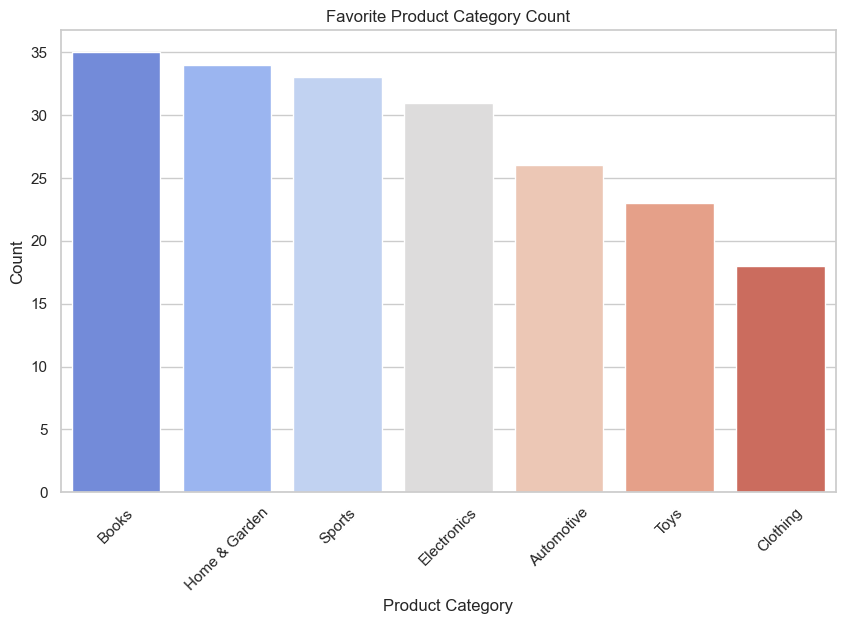

In [56]:
# Bar chart for Favorite Product Category count
plt.figure(figsize=(10, 6))
product_category_count = customer_data['Favorite_Product_Category'].value_counts()
sns.barplot(x=product_category_count.index, y=product_category_count.values, palette='coolwarm')
plt.title('Favorite Product Category Count')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

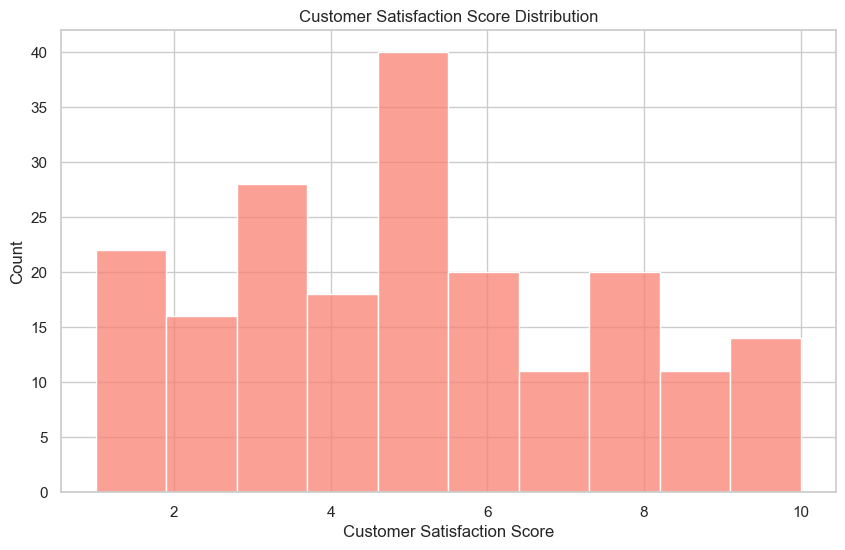

In [57]:
# Bar chart for Customer Satisfaction Score
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['Customer_Satisfaction_Score'], bins=10, kde=False, color='salmon')
plt.title('Customer Satisfaction Score Distribution')
plt.xlabel('Customer Satisfaction Score')
plt.ylabel('Count')
plt.show()

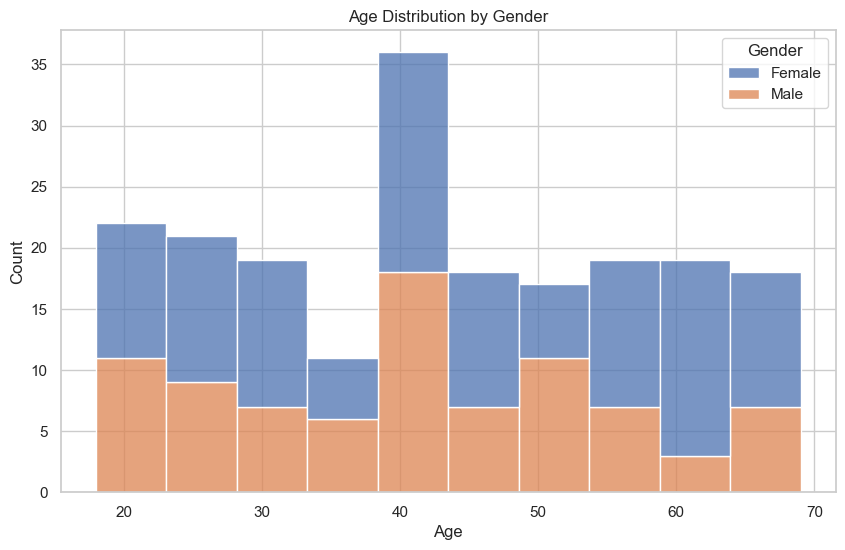

In [58]:
# Bar chart for Age and Gender
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_data, x='Age', hue='Gender', multiple='stack', bins=10, kde=False)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()